# 利用 Apriori 分析關於乳癌患者存活率的分析

**日期: 2018/5/16**

**作者: 趙冠豪**

**系級: 電機二**

## Information about dataset : 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [303]:
require(arules)
require(arulesViz)

In [317]:
data <- read.csv("haberman.csv")

## 將資料的區間重新分配

In [318]:
data$X30[data$X30 <= 40] = "<40"
data$X30[data$X30 >40 & data$X30 <= 50 ] = "<50 & >40"
data$X30[data$X30 >50 & data$X30 <= 60 ] = "<60 & >50"
data$X30[data$X30 >60 & data$X30 <= 70 ] = "<70 & >60"
data$X30[data$X30 > 70] = ">70"

In [319]:
data$X64[data$X64 <= 58] = "<=58"
data$X64[data$X64 > 58] = ">58"

In [320]:
data$X1[data$X1 <= 5] = "<=5"
data$X1[data$X1 != "<=5"] = ">5"

In [321]:
data$X1.1[data$X1.1 == 1] = "Yes"
data$X1.1[data$X1.1 == "2"] = "No"

In [322]:
colnames(data) <- c("age", "19XX", "positive axillary nodes detected", "Servive more than 5 year")

## 整理完的資料結果

In [323]:
data

age,19XX,positive axillary nodes detected,Servive more than 5 year
<40,>58,<=5,Yes
<40,>58,<=5,Yes
<40,>58,<=5,Yes
<40,>58,<=5,Yes
<40,<=58,>5,Yes
<40,>58,<=5,Yes
<40,>58,<=5,No
<40,>58,>5,No
<40,<=58,>5,Yes
<40,>58,<=5,Yes


## 套用 apriori 的function

In [324]:
#one approach it to index with the $ sign and the as.factor function
data$age <- as.factor(data$age)
data$"19XX"<- as.factor(data$"19XX")
data$"positive axillary nodes detected" <- as.factor(data$"positive axillary nodes detected")
data$"Servive more than 5 year" <- as.factor(data$"Servive more than 5 year")
#another approach
# mtcars[, 'cyl'] <- as.factor(mtcars[, 'cyl'])
str(data)  # now look at the classes

'data.frame':	305 obs. of  4 variables:
 $ age                             : Factor w/ 5 levels "<40","<50 & >40",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 19XX                            : Factor w/ 2 levels "<=58",">58": 2 2 2 2 1 2 2 2 1 2 ...
 $ positive axillary nodes detected: Factor w/ 2 levels "<=5",">5": 1 1 1 1 2 1 1 2 2 1 ...
 $ Servive more than 5 year        : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 1 1 2 2 ...


In [325]:
str(data)

'data.frame':	305 obs. of  4 variables:
 $ age                             : Factor w/ 5 levels "<40","<50 & >40",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 19XX                            : Factor w/ 2 levels "<=58",">58": 2 2 2 2 1 2 2 2 1 2 ...
 $ positive axillary nodes detected: Factor w/ 2 levels "<=5",">5": 1 1 1 1 2 1 1 2 2 1 ...
 $ Servive more than 5 year        : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 1 1 2 2 ...


In [326]:
rule <- apriori(data, 
  # min support & confidence, 最小規則長度(lhs+rhs)
  parameter=list(minlen=3, supp=0.1, conf=0.7),  
  appearance = list(default="lhs",
                    rhs=c("Servive more than 5 year=Yes", "Servive more than 5 year=No") 
                    # 右手邊顯示的特徵
  )
)  

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5     0.1      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[11 item(s), 305 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [11 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [327]:
inspect(rule)
sort.rule <- sort(rule, by="lift")
inspect(sort.rule)

     lhs                                       rhs                              support confidence      lift count
[1]  {age=<40,                                                                                                    
      19XX=>58}                             => {Servive more than 5 year=Yes} 0.1049180  0.8888889 1.2103175    32
[2]  {age=<70 & >60,                                                                                              
      positive axillary nodes detected=<=5} => {Servive more than 5 year=Yes} 0.1245902  0.7755102 1.0559402    38
[3]  {age=<70 & >60,                                                                                              
      19XX=>58}                             => {Servive more than 5 year=Yes} 0.1311475  0.7547170 1.0276280    40
[4]  {age=<50 & >40,                                                                                              
      positive axillary nodes detected=<=5} => {Servive more than 5 year=Yes} 0.

In [328]:
subset.matrix <- as.matrix(is.subset(x=sort.rule, y=sort.rule))
subset.matrix[lower.tri(subset.matrix, diag=T)] <- NA
redundant <- colSums(subset.matrix, na.rm=T) >= 1
sort.rule <- sort.rule[!redundant]
inspect(sort.rule)

    lhs                                       rhs                              support confidence      lift count
[1] {age=<40,                                                                                                    
     19XX=>58}                             => {Servive more than 5 year=Yes} 0.1049180  0.8888889 1.2103175    32
[2] {age=<70 & >60,                                                                                              
     19XX=>58,                                                                                                   
     positive axillary nodes detected=<=5} => {Servive more than 5 year=Yes} 0.1081967  0.8461538 1.1521291    33
[3] {19XX=>58,                                                                                                   
     positive axillary nodes detected=<=5} => {Servive more than 5 year=Yes} 0.5475410  0.8146341 1.1092117   167
[4] {age=<60 & >50,                                                                     

## 畫圖找結論

Warning message:
“Unknown control parameters: type”

Available control parameters (with default values):
main	 =  Graph for 9 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB

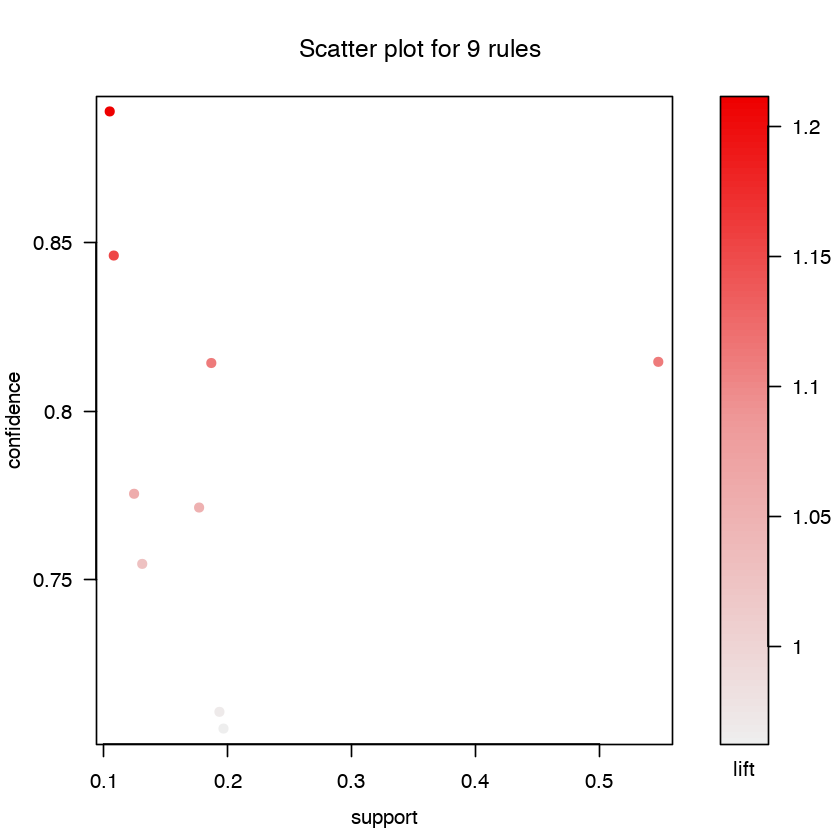

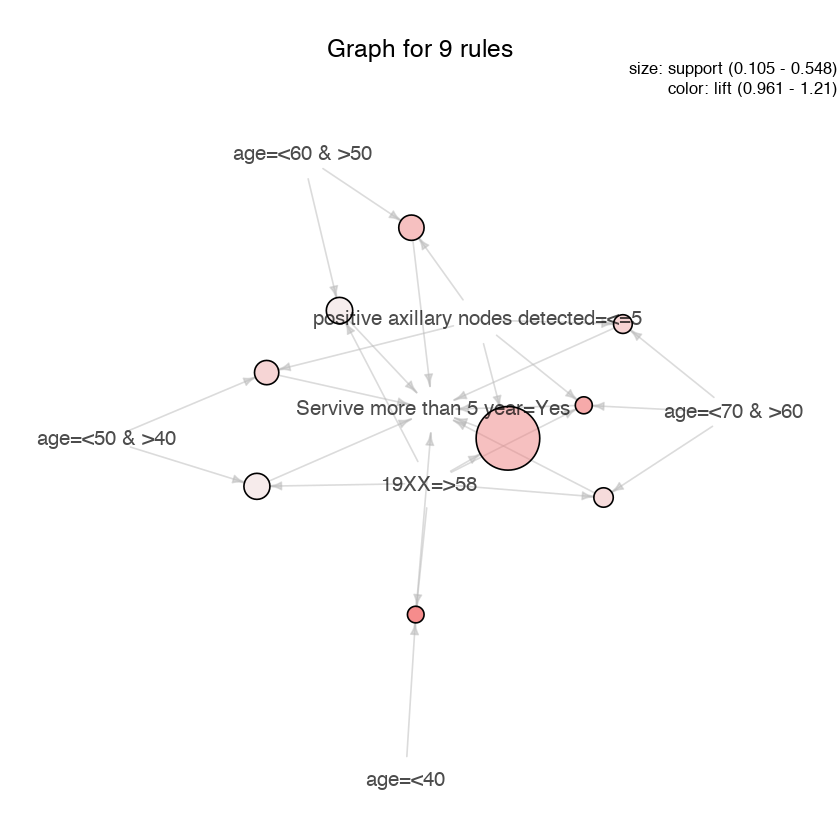

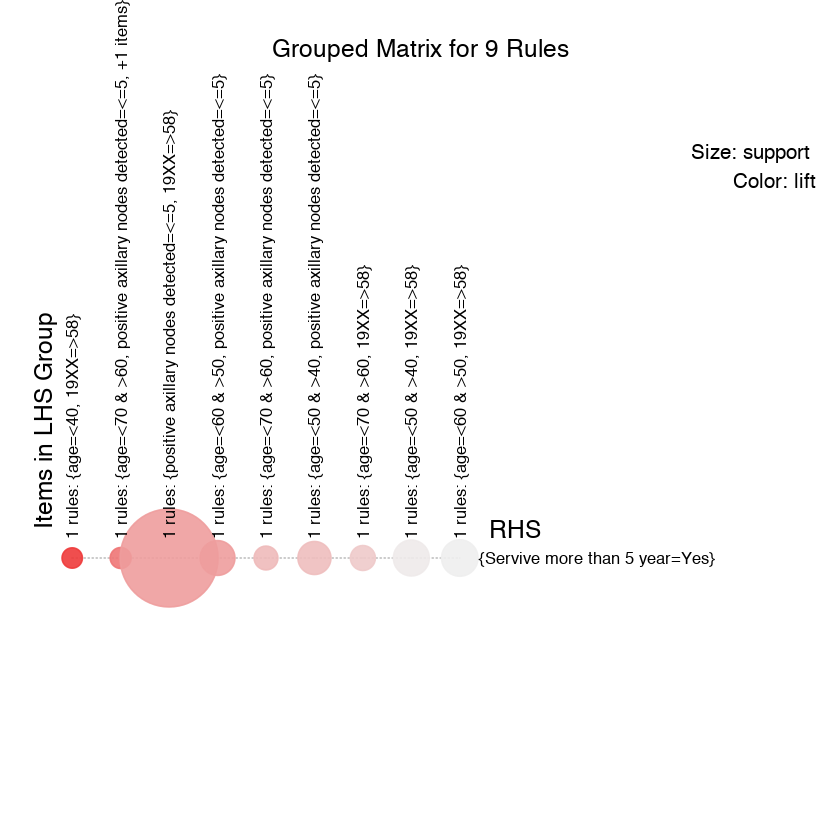

In [329]:
require(arulesViz)
plot(sort.rule)
plot(sort.rule, method="graph", control=list(type="items"))
plot(sort.rule, method="grouped")